Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im1.jpeg...


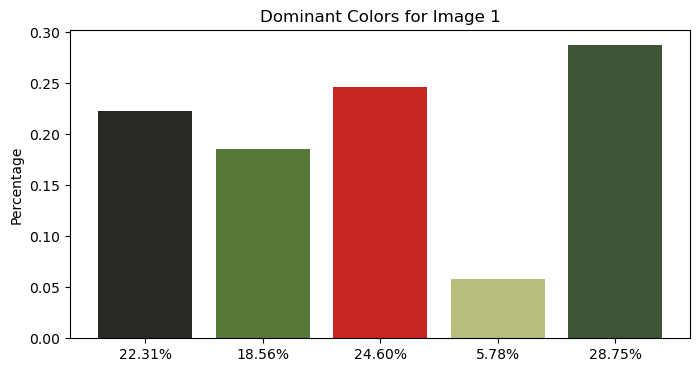

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im2.jpeg...


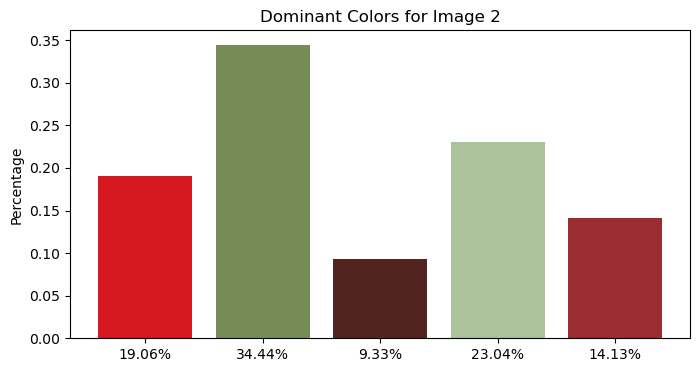

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im3.jpeg...


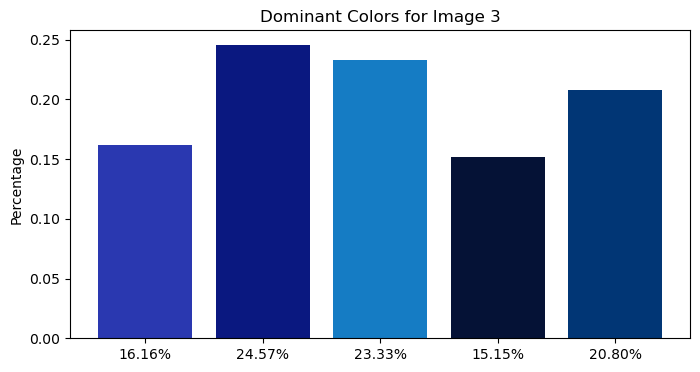

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im4.jpeg...


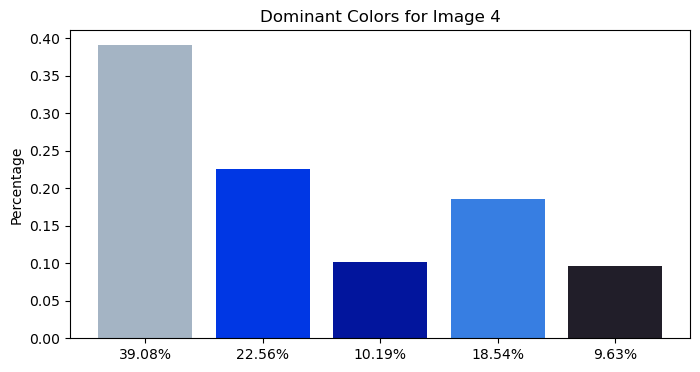

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im5.jpeg...


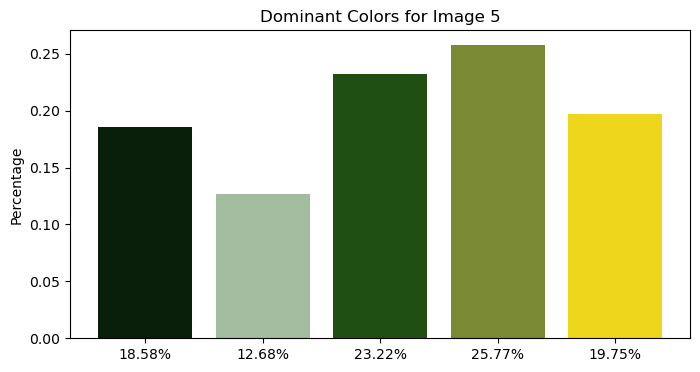

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im6.jpeg...


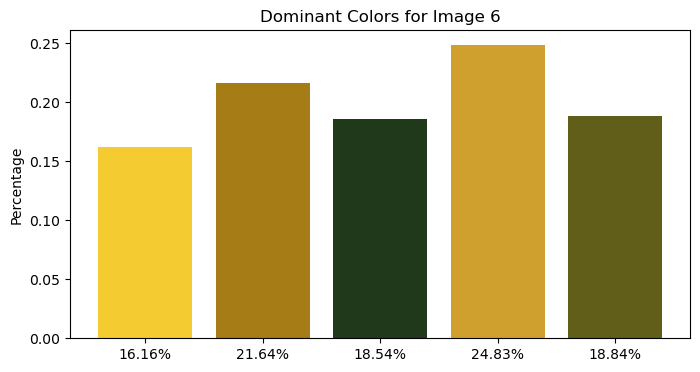


Similarity based on color percentages between images:
Similarity between Image 1 and Image 2: 0.9563
Similarity between Image 1 and Image 3: 0.8982
Similarity between Image 1 and Image 4: 0.8798
Similarity between Image 1 and Image 5: 0.9451
Similarity between Image 1 and Image 6: 0.9656
Similarity between Image 2 and Image 3: 0.9091
Similarity between Image 2 and Image 4: 0.8928
Similarity between Image 2 and Image 5: 0.9361
Similarity between Image 2 and Image 6: 0.9572
Similarity between Image 3 and Image 4: 0.9184
Similarity between Image 3 and Image 5: 0.8521
Similarity between Image 3 and Image 6: 0.8753
Similarity between Image 4 and Image 5: 0.8413
Similarity between Image 4 and Image 6: 0.8639
Similarity between Image 5 and Image 6: 0.9568

Comparison of the most dominant color across all images:
Image 1: Most dominant color [63 84 52] with percentage 28.75%
Image 2: Most dominant color [117 140  86] with percentage 34.44%
Image 3: Most dominant color [ 10  24 128] with perce

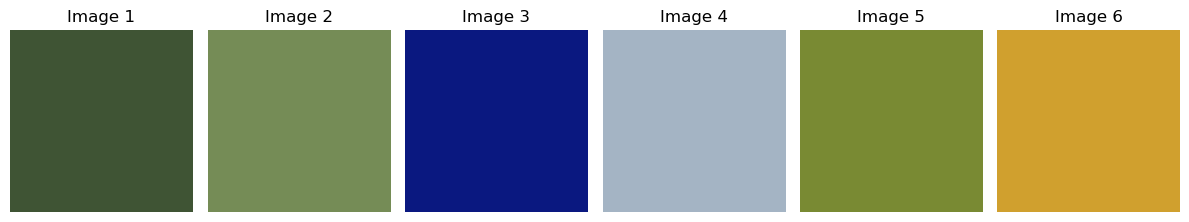

In [3]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

def extract_dominant_colors(image_path, k=5):

    image = cv2.imread(image_path)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    pixels = image_lab.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    dominant_colors_lab = kmeans.cluster_centers_.astype(int)
    
    dominant_colors_rgb = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_LAB2RGB)[0][0] for color in dominant_colors_lab]
    
    _, counts = np.unique(kmeans.labels_, return_counts=True)
    percentages = counts / len(kmeans.labels_)  # Normalize counts to get percentages
    
    return dominant_colors_lab, dominant_colors_rgb, percentages

def calculate_similarity(colors1, colors2):
    colors1 = np.array(colors1).reshape(-1, 3)
    colors2 = np.array(colors2).reshape(-1, 3)
    
    similarity = cosine_similarity(colors1, colors2)
    return np.mean(similarity)

def plot_dominant_colors_with_percentages(dominant_colors_rgb, percentages, title):
    plt.figure(figsize=(8, 4))
    
    for i, (color, percentage) in enumerate(zip(dominant_colors_rgb, percentages)):
        plt.bar(i, percentage, color=np.array(color) / 255)
    
    plt.xticks(range(len(dominant_colors_rgb)), [f'{percentage*100:.2f}%' for percentage in percentages])
    plt.title(title)
    plt.ylabel('Percentage')
    plt.show()

def process_images(image_folder, k=5):
    dominant_colors_lab_list = []
    dominant_colors_rgb_list = []
    percentages_list = []
    image_names = []

    for i in range(1, 7):
        image_path = os.path.join(image_folder, f'im{i}.jpeg')
        print(f"Processing {image_path}...")
        
        dominant_colors_lab, dominant_colors_rgb, percentages = extract_dominant_colors(image_path, k)
        
        dominant_colors_lab_list.append(dominant_colors_lab)
        dominant_colors_rgb_list.append(dominant_colors_rgb)
        percentages_list.append(percentages)
        image_names.append(f'Image {i}')
        
        plot_dominant_colors_with_percentages(dominant_colors_rgb, percentages, f'Dominant Colors for Image {i}')
    
    print("\nSimilarity based on color percentages between images:")
    for i in range(len(dominant_colors_lab_list)):
        for j in range(i + 1, len(dominant_colors_lab_list)):
            similarity = calculate_similarity(dominant_colors_lab_list[i], dominant_colors_lab_list[j])
            print(f"Similarity between {image_names[i]} and {image_names[j]}: {similarity:.4f}")

    print("\nComparison of the most dominant color across all images:")
    for i, (dominant_colors_rgb, percentages) in enumerate(zip(dominant_colors_rgb_list, percentages_list)):
        most_dominant_color = dominant_colors_rgb[np.argmax(percentages)]
        most_dominant_percentage = np.max(percentages)
        print(f"{image_names[i]}: Most dominant color {most_dominant_color} with percentage {most_dominant_percentage*100:.2f}%")
    
    print("\nVisual Comparison of Most Dominant Color in Each Image:")
    plt.figure(figsize=(12, 4))
    for i, (dominant_colors_rgb, percentages) in enumerate(zip(dominant_colors_rgb_list, percentages_list)):
        most_dominant_color = dominant_colors_rgb[np.argmax(percentages)]
        plt.subplot(1, 6, i + 1)
        plt.imshow([[most_dominant_color]])
        plt.axis('off')
        plt.title(f'{image_names[i]}')
    plt.tight_layout()
    plt.show()

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images'
process_images(image_folder, k=5)